In [1]:
from parameter_object import parameterClass
%pylab inline
#Imports .mdf files for providing ground-truth data.
from sklearn.cross_validation import ShuffleSplit
import numpy as np
#sys.path.append('resources')
#sys.path.append('final_software')
import v2_functions as v2
reload(v2)
from scipy.ndimage import measurements, center_of_mass,filters
from sklearn.ensemble import ExtraTreesRegressor
import time
import tifffile as tif_fn
import csv
import cPickle as pickle
def read_ground_truth(file_name,time_pt):
    f = open(str(file_name),'r')
    txt = f.readlines()
    track ={}
    temp_x = []
    temp_y = [];
    temp_z = [];
    name = []
    #Populates new array if line is 'Track', and adds points if labelled 'Point'
    for i in range(0,txt.__len__()):
        line = txt[i].split(' ')
        if line[0] == 'Track':
            name.append(line[1])
            if temp_x.__len__() >0:
                track[int(name[-2])] = [temp_x, temp_y, temp_z]
            temp_x = [];
            temp_y = [];
            temp_z = [];

        elif line[0] == 'Point':        
            temp_x.append(float(line[2]))
            temp_y.append(float(line[3]))
            temp_z.append(float(line[5]))
    
    
    if temp_x.__len__() >0:
        track[int(name[-1])] = [temp_x, temp_y, temp_z]
    
    #Empty array.
    lengths = []
    dots = []
    for t in track:
        lengths.append(track[t][0].__len__())
    
    #Finds the median point on the label.
    average_height = np.median(np.array(lengths))
    center_pt = int((average_height-1)/2)
    
    #Find the rectangles of interest.
    rects = (time_pt, int(0), int(0), int(abs(par_obj.width)), int(abs(par_obj.height)))

    #accepts and calculates track centers from tracks which are at least larger than half the median.
    track_center = []
    for t in track:
        x = track[t][0]
        y = track[t][1]
        z = track[t][2]
        if x.__len__() > center_pt:
            #Always calculates the track center.
            cent_x = x[int(round(x.__len__()/2,0))]
            cent_y = y[int(round(x.__len__()/2,0))]
            cent_z = z[int(round(x.__len__()/2,0))]
        track_center.append([cent_y,cent_x,cent_z])

    return track_center

Populating the interactive namespace from numpy and matplotlib


[0] [0]
tiff resolution not recognised
Calculating features
tiff resolution not recognised
version1
Calculating Features for Z:10 Timepoint: 1 File: 1
tiff resolution not recognised
version1
Calculating Features for Z:1 Timepoint: 1 File: 1
tiff resolution not recognised
version1
Calculating Features for Z:9 Timepoint: 1 File: 1
tiff resolution not recognised
version1
Calculating Features for Z:20 Timepoint: 1 File: 1
Time to train 0.544596195221
Calculating features for evaluation
tiff resolution not recognised
version1
Calculating Features for Timepoint: 1 All  Frames File: 1
3.11016201973
Calculating Features for Z: 2 Timepoint: 1 File: 1
Calculating Features for Z: 3 Timepoint: 1 File: 1
Calculating Features for Z: 4 Timepoint: 1 File: 1
Calculating Features for Z: 5 Timepoint: 1 File: 1
Calculating Features for Z: 6 Timepoint: 1 File: 1
Calculating Features for Z: 7 Timepoint: 1 File: 1
Calculating Features for Z: 8 Timepoint: 1 File: 1
Calculating Features for Z: 11 Timepoint: 1 

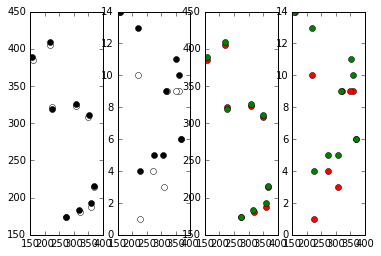

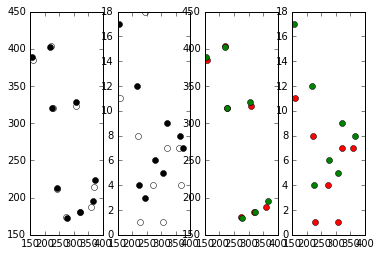

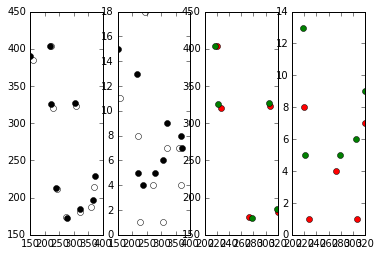

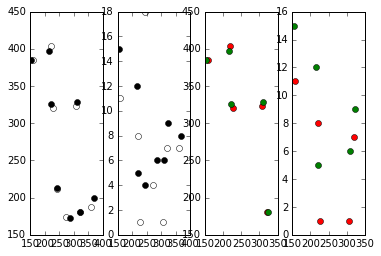

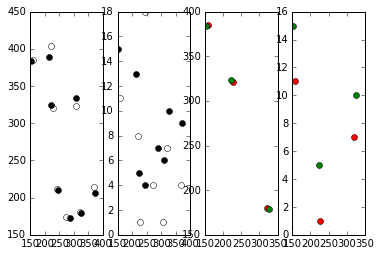

In [2]:

#This is a class and function which takes over the print output in the absence of the gui.
class intObject():
    def __init__(self):
        self.pa = None
    def report_progress(self,string):
        d=0
        print(string)
        
    
#Here we choose which of our experiments to run.
for exp in [1]:
    

    
    if exp == 1:
        path = '/Users/dwaithe/Documents/collaborators/hailstoneM/4d_examples/Live_mdf/'
        tif_out_path = '/Users/dwaithe/Documents/collaborators/hailstonem/out'
    
    #This is where we have the parameter sets.
    for num_of_train in [1]:
        #Number of times to repeat.
        for bc in range(0,1):
            int_obj = intObject()
            
            
            ####If we have cross-validation.
            #if exp ==1:
            #    ss = ShuffleSplit(30, n_iter=1, test_size=15, train_size=num_of_train)
            #for train_index, test_index in ss:
                 #print("%s %s" % (train_index, test_index))
            ####
            ###Remove the following in favour of the above cross-validation
            train_index = [0]
            test_index = [0]
            ###
    
            temp_index = list(train_index)
            #temp_index.extend(list(test_index))
            #test_index = temp_index
            print train_index, test_index
            par_obj = parameterClass()
            int_obj = intObject()
            par_obj.gt_sum = {}
            par_obj.gt_dense ={}
            par_obj.f_matrix =[]
            par_obj.o_patches=[]
            par_obj.gt_sum = {}
            par_obj.gt_dense ={}
            par_obj.gt_file_array = []
            par_obj.frames_2_load = {}
            par_obj.gt_array =[]
            
            
            ####May want to change these of course for the hessian and maxima finding.
            #par_obj.min_distance
            #par_obj.abs_thr
            #par_obj.rel_thr
            ####
            
            par_obj.feature_type = 'basic'

            if exp == 1:
                
                nstr = [0]*1#Number of files to upload
            
            
            datasets=['dense_arr','feat_arr','double_feat_arr','pred_arr','sum_pred','maxi_arr','pts','roi_stk_x','roi_stk_y','roi_stkint_x','roi_stkint_y']
            par_obj.data_store={}
            
            for dataname in datasets:
                par_obj.data_store[dataname]={}
            
            
            #We initalize each of our images in our experiments.
            for i in range(0,nstr.__len__()):
                n = str(i).zfill(3)
                if exp == 1:
                    par_obj.ch_active =[0,1]
                    par_obj.sigma =  float(4);
                    pixel_cut_off_3D = 10.0
                    
                    #i =0 is the first datafile. To add more do i==1 etc.
                    if i == 0:
                        ##############
                        ############## These are the parameters of our first datafile.
                        ##############
                        
                        #Input image.
                        file_str = path+'/Concatenated Stacks_resized-1_every10.tif'
                        #User training.
                        ROI_str = path+'/Concatenated Stacks_resized-1_every10.quantiROI'
                        
                        #The ground-truth. Indexed by time-point.
                        gt_time_pt = {}
                        gt_time_pt[0]  = path+'Concatenated Stacks_resized-1_every10.tif.mdf'
                        gt_time_pt[1]  = path+'Concatenated Stacks_resized-1_every10.tif2.mdf'
                        gt_time_pt[2]  = path+'Concatenated Stacks_resized-1_every10.tif3.mdf'
                        gt_time_pt[3]  = path+'Concatenated Stacks_resized-1_every10.tif4.mdf'
                        gt_time_pt[4]  = path+'Concatenated Stacks_resized-1_every10.tif5.mdf'
                        gt_time_pt[5]  = path+'Concatenated Stacks_resized-1_every10.tif6.mdf'
                        gt_time_pt[6]  = path+'Concatenated Stacks_resized-1_every10.tif7.mdf'
                        gt_time_pt[7]  = path+'Concatenated Stacks_resized-1_every10.tif8.mdf'
                        gt_time_pt[8]  = path+'Concatenated Stacks_resized-1_every10.tif9.mdf'
                        gt_time_pt[9]  = path+'Concatenated Stacks_resized-1_every10.tif10.mdf'
                        gt_time_pt[10] = path+'Concatenated Stacks_resized-1_every10.tif11.mdf'
                        gt_time_pt[11] = path+'Concatenated Stacks_resized-1_every10.tif12.mdf'
                        gt_time_pt[12] = path+'Concatenated Stacks_resized-1_every10.tif13.mdf'
                        gt_time_pt[13] = path+'Concatenated Stacks_resized-1_every10.tif14.mdf'
                        gt_time_pt[14] = path+'Concatenated Stacks_resized-1_every10.tif15.mdf'
                        
                        par_obj.file_array.append(file_str)
                        par_obj.gt_array.append(gt_time_pt)
                

            #Gets the dimensional information from the first file.
            #Assumes they are all the same. May not be true, but Martin you changed the data_structure :-).
            v2.import_data_fn(par_obj,[par_obj.file_array[0]])
            
            par_obj.total_time_pt = 5 #########HERE IS TO BE DELETED
            par_obj.time_pt_list = np.arange(0,par_obj.total_time_pt)
            par_obj.max_file = nstr.__len__()
            
            
            par_obj.time_pt_list = [0,1,2,3,4]#########HERE IS TO BE DELETED
            par_obj.initiate_data_store()
            
            ########################
            ########################
            ########################
           
            
            
            print('Calculating features')
            
            #Import ROI for file.
            ROI_file = pickle.load( open(ROI_str,"rb"))
            par_obj.saved_dots = ROI_file['dots']
            par_obj.saved_ROI = ROI_file['rect']
            

            #Need to update this with the imported saved points.
            for b in train_index:

    
                #print "Image_id\t",b, 'time taken: ',t2-t1
                #Need to initialise are region for each image, which encompasses the whole plane.
                for i in range(0,par_obj.saved_ROI.__len__()):
                    rects = par_obj.saved_ROI[i]
                    zslice = par_obj.saved_ROI[i][0]
                    tpt = par_obj.saved_ROI[i][5]
                    imno = par_obj.saved_ROI[i][6]
                    v2.import_data_fn(par_obj,[par_obj.file_array[b]])
                    par_obj.height = par_obj.ori_height
                    par_obj.width = par_obj.ori_width
                    
                    
                    #Load in image data
                    v2.im_pred_inline_fn_new(par_obj, int_obj,[zslice],[tpt],[imno],threaded=False)
                    #Create the input kernel 3-D map.
                    v2.update_com_fn(par_obj,tpt,zslice,imno)
                    #Take the annotations and the features.
                    v2.update_training_samples_fn_new_only(par_obj,int_obj,rects)
                    
                    



            ##### Trains the forest. #####

            par_obj.RF ={}
            par_obj.RF[0] = ExtraTreesRegressor(par_obj.num_of_tree, max_depth=par_obj.max_depth, min_samples_split=par_obj.min_samples_split, min_samples_leaf=par_obj.min_samples_leaf, max_features=par_obj.max_features, bootstrap=True, n_jobs=-1)


            par_obj.pred_arr = {}
            par_obj.sum_pred = {}


            #Fits the data.
            t3 = time.time()
            par_obj.RF[0].fit(par_obj.f_matrix, par_obj.o_patches)
            rf_score = par_obj.RF[0].score(par_obj.f_matrix, par_obj.o_patches)
            t4 = time.time()
            time_to_train = t4-t3
            print 'Time to train',time_to_train
            

            ##### Evaluation of images. ######
            
            par_obj.final_prediction = {}
            time_taken_to_calc_feat = []
            time_taken_to_eval_trees = []
            print 'Calculating features for evaluation'
            par_obj.the_score = {}
            par_obj.data_store['gt_pts'] ={}
            for fileno in test_index:
                par_obj.sum_pred ={}

                t1 = time.time()
                file_str = par_obj.file_array[fileno]
                #We import the image.
                v2.import_data_fn(par_obj,[file_str])
                par_obj.total_time_pt = 5#########HERE IS TO BE DELETED
                #Encase they are different.
                par_obj.height = par_obj.ori_height
                par_obj.width = par_obj.ori_width
                zslice_list = np.arange(0,par_obj.max_zslices)
                time_list = np.arange(0,par_obj.total_time_pt)
                
                
                #Read in the frames.
                v2.im_pred_inline_fn_new(par_obj, int_obj,zslice_list,time_list,[fileno],threaded=True)
                #Evalute the forest for each slice.
                v2.evaluate_forest_new(par_obj,int_obj,False,0,zslice_list,time_list,[fileno],threaded=False,b=b,arr='feat_arr')
                t2 = time.time()
                time_taken_to_calc_feat.append(t2-t1)
                print 'Image_id: ',fileno,' time taken to calc features: ',time_taken_to_calc_feat[-1]
                par_obj.frames_2_load = zslice_list
                
                
                ###########
                ########### Will export a particular timepoint to visualise.
                ###########
                #with tif_fn.TiffWriter(tif_out_path+'/exp_'+str(exp)+'_image-dense_0'+str(b)+'.tif', bigtiff=True) as tif:
                #    for zslice in zslice_list:
                #        tif.save(np.array(par_obj.data_store['pred_arr'][b][0][zslice]), compress=0)
                #
                ###########
                ###########
                ###########
                
                
                
                
                ########### 
                ###########This is where we start our peformance calculation.
                ###########
                
                #This is the container for the ground-truths points that we load in.
                par_obj.data_store['gt_pts'][fileno] = {}
                for time_pt in par_obj.time_pt_list:
                    v2.count_maxima(par_obj,time_pt,fileno)
                    
                    gt_pts = read_ground_truth(par_obj.gt_array[fileno][time_pt],time_pt)
                    par_obj.data_store['gt_pts'][fileno][time_pt] = gt_pts

                    ###########
                    ########### Plot all the points.
                    ###########
                    #for y0,x0,z0 in par_obj.data_store['pts'][fileno][time_pt]:
                    #    plot(x0,y0,'ro')
                    #for y1,x1,z1 in par_obj.data_store['gt_pts'][fileno][time_pt]:
                    #    plot(x1,y1,'bo')
                    ###########
                    ###########
                    ###########

                    rel = []
                    gbl_min = []

                    #Next we want to for every predicted point calculate the distance to the nearest ground-truth point.
                    for y0,x0,z0 in par_obj.data_store['pts'][fileno][time_pt]:
                        dist_arr = []
                        for y1,x1,z1 in par_obj.data_store['gt_pts'][fileno][time_pt]:
                            #Euclidean distance.
                            dis = np.sqrt((y1-y0)**2 + (x1-x0)**2  +(z1-z0)**2)
                            dist_arr.append(dis)
                        #Nearest distance indice 
                        rel.append(np.argmin(dist_arr))
                        #Nearest distance distance.
                        gbl_min.append(np.min(dist_arr))

                    pred_to_keep = []
                    gt_to_keep = []
                    dist_in_3D_pixels = []


                    #Go through all of the relatives.
                    for i in set(rel):
                        #Find the indices where there a multiple nearest matches.
                        ind = np.where(np.array(rel) == i)[0]
                        #Finds the minimum index of the valid distances.
                        dist_ind = ind[np.argmin(np.array(gbl_min)[ind])]
                        min_dist = np.min(np.array(gbl_min)[ind])
                        #pts which are nearest.
                        pred_to_keep.append(dist_ind)
                        gt_to_keep.append(rel[dist_ind])
                        dist_in_3D_pixels.append(min_dist)


                    ########### This is where we compare the two lists.
                    ########### We can extract the x,y,z coordinates if we want more elaborate comparison than 3D Distance
                    ########### 
                    figure()
                    for y0,x0,z0 in par_obj.data_store['pts'][fileno][time_pt][pred_to_keep]:
                        subplot(1,4,1)
                        plot(x0,y0,'wo')
                        subplot(1,4,2)
                        plot(x0,z0,'wo')
                    
                    for y1,x1,z1 in np.array(par_obj.data_store['gt_pts'][fileno][time_pt])[gt_to_keep]:
                        subplot(1,4,1)
                        plot(x1,y1,'ko')
                        subplot(1,4,2)
                        plot(x1,z1,'ko')
                    ###########
                    ###########
                    ###########

                    #Trim the 3-D distances down to the ones within a distances. Default: pixel_cut_off_3D
                    index_valid =  np.array(dist_in_3D_pixels) < pixel_cut_off_3D
                    #Take those indices which match this from the nearest neighbour short-list.
                    pred_to_keep_within_dist = np.array(pred_to_keep)[index_valid]
                    gt_to_keep_within_dist = np.array(gt_to_keep)[index_valid]

                    ########### This is for plotting the distances
                    ###########
                    ###########
                    #Plot those remaining. Can also
                    for y0,x0,z0 in par_obj.data_store['pts'][fileno][time_pt][pred_to_keep_within_dist]:
                        subplot(1,4,3)
                        plot(x0,y0,'ro')
                        subplot(1,4,4)
                        plot(x0,z0,'ro')
                    for y1,x1,z1 in np.array(par_obj.data_store['gt_pts'][fileno][time_pt])[gt_to_keep_within_dist]:
                        subplot(1,4,3)
                        plot(x1,y1,'go')
                        subplot(1,4,4)
                        plot(x1,z1,'go')
                    ###########
                    ###########
                    ###########

                    num_gt = float(par_obj.data_store['gt_pts'][fileno][time_pt].__len__())
                    num_hits = float(gt_to_keep_within_dist.__len__())
                    c = 0
                    for dots in par_obj.saved_dots:
                        for dot in dots:
                            c += 1

                    ###########
                    ########### These are the details we are interested in.
                    ###########
                    
                    print '--------------------------------------------------------------------------------'
                    print 'filename',par_obj.file_array[fileno]
                    print 'time point',time_pt
                    print 'number of training dots', c
                    print 'number of predicted centres', par_obj.data_store['pts'][fileno][time_pt].shape[0]
                    print 'ground_truths total', num_gt
                    print 'predicted points total', float(par_obj.data_store['pts'][fileno][time_pt].shape[0])
                    true_positives = num_hits
                    print 'Valid centres (True positives)', true_positives
                    false_positives = float( par_obj.data_store['pts'][fileno][time_pt].shape[0])-float(pred_to_keep_within_dist.shape[0])
                    print 'Invalid centres (False positives)',false_positives 
                    false_negatives = float(num_gt)-float(pred_to_keep_within_dist.shape[0])
                    print 'Non-matched ground-truth points (False negatives)', false_negatives
                    ###########
                    ###########
                    ###########    
            
            """
            csvPath = "/Users/dwaithe/Documents/collaborators/WaitheD/simulated Data/drosophilaBrain/large_dots/";
            output = '\tPath of data:\t',path,'\time to train\t',time_to_train,'\tnumber of training images.\t',num_of_train,'\tthe score\t',rf_score
            with open(csvPath+'outputDataLastTrainFIN.csv', 'a') as csvfile:
                spamwriter = csv.writer(csvfile,  dialect='excel')
                spamwriter.writerow(output)
            per_err =[]
            for i,item in enumerate(test_index):
                test= False
                for c in train_index:
                    if item  == c:
                        test = True;
                per_err.append((1-(abs(par_obj.gt_dense[item] - par_obj.final_prediction[item])/par_obj.gt_dense[item]))*100)
                #output =  "\timage_id\t",item,"\ttime to process\t",time_taken_to_calc_feat[i],"\ttime to evaluate\t",time_taken_to_eval_trees[i],"\ttest\t",test,"\tgt_dense\t",par_obj.gt_dense[item],"\tfinal_predicion\t",par_obj.final_prediction[item],"\tper_err\t",per_err,"\tthe_score\t",par_obj.the_score[item]
            output = "\toutput\t",np.average(per_err)
            print output
            with open(csvPath+'outputDataLastTrainFIN.csv', 'a') as csvfile:
                    spamwriter = csv.writer(csvfile,  dialect='excel')
                    spamwriter.writerow(output)"""